# Project: Workplace Reviews


A client has come to you with a data file containing workplace reviews by **current** and **former** employees. They want to understand more about the data they have but they don’t know what value they can derive from it. It’s your job to garner business value from the given information and pose the findings to the client.

Understanding an individual employee's behaviour can help to develop those methodologies that matter to the business. In this project, you derive meaningful review segmentations. You will employ supervised algorithms of your choice to model individuals' review using data collected from the employer. The goal with this implementation is to construct a model that accurately predicts whether an individual will leave or stay in the company with a pleasant experience. This sort of task and feedback arise in management, where the new strategy helps employees become better at their job. 



## Executive Summary


Following information was derived from statistical and NLP analysis:

1. All the ratings from 2012 to 2019 are slightly declined for current and former employees.
2. Although the lowest average rating belongs to salary and benefit, it has low impact on final rating. 
3. The rate of decline for Management and job security seems to be more than others.
4. For all former employees, life balance and job culture have the highest role in determining the final rating.
5. 14% of former employees that provided lower final rating (1 or 2) have more concern about management and life balance. Salary and job security do not have a significant impact on their final rating.
6. NLP analysis indicates that two features, a fast-paced work environment and poor management, are the main complains for former employees. 
 


## Getting Started

The dataset for this project is public and was offered by Tim Horton. The data that we investigate has 13020 observations and consists of the following attributes:

Rating                               
Title                                
Body                                 
Job Title                            
Location                             
Date                                 
Rating - Job Work/Life Balance      
Rating - Salary/Benefits            
Rating - Job Security/Advancement    
Rating - Management                  
Rating - Job Culture                 
Employment Status      


## Exploring the Data

Run the code cell below to load necessary Python libraries and load the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import seaborn as sns
import os


os.getcwd()

#Read file
data_directory = os.path.join('/Users/niloofarzarifi/Desktop/Udacity/khaneh/Tim')
data = pd.read_excel(os.path.join(data_directory, "takehome-sample-2019-09-17.xlsx"),index_col=0)

In [2]:
#basic columns type information. 'Title' and 'Employment Status' has some missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13020 entries, 0 to 13019
Data columns (total 12 columns):
Rating                               13020 non-null int64
Title                                13018 non-null object
Body                                 13020 non-null object
Job Title                            13020 non-null object
Location                             13020 non-null object
Date                                 13020 non-null object
Rating - Job Work/Life Balance       13020 non-null int64
Rating - Salary/Benefits             13020 non-null int64
Rating - Job Security/Advancement    13020 non-null int64
Rating - Management                  13020 non-null int64
Rating - Job Culture                 13020 non-null int64
Employment Status                    13018 non-null object
dtypes: int64(6), object(6)
memory usage: 1.3+ MB


## Data Exploration
<br>

### pandas_profiling

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

    .Essentials: type, unique values, missing values
    .Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
    .Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of    variation, kurtosis, skewness
    .Most frequent values
    .Histogram
    .Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
    .Missing values matrix, count, heatmap and dendrogram of missing values

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [3]:
print ('There is no duplication', data.duplicated().sum())


('There is no duplication', 0)


Apparently, there are only 4 missing values that can be removed

In [4]:
print (data.isnull().sum())
data=data.dropna()
data.shape

Rating                               0
Title                                2
Body                                 0
Job Title                            0
Location                             0
Date                                 0
Rating - Job Work/Life Balance       0
Rating - Salary/Benefits             0
Rating - Job Security/Advancement    0
Rating - Management                  0
Rating - Job Culture                 0
Employment Status                    2
dtype: int64


(13016, 12)

**The function below helps to find specific value**

For example human age:999 could stand for missing value 

In [5]:
COL_LIST=list(data)  
COL_LIST_OBJECT=list(data.select_dtypes(include =['O'])) #['float64'] Or ['O'] or ['int64']


def find_value(check_value):
    if type(check_value)==str:  #error if you check str for float or int columns
        print ('Looking for string:%s'%check_value, "in all columns")
        for i in range(len(COL_LIST_OBJECT)):
            case={COL_LIST_OBJECT[i]:list(data[data[COL_LIST_OBJECT[i]]==check_value].index)}
            print(case)         
    else:
        print ('Looking for number:%d'%check_value, "in all columns")
        for i in range(len(COL_LIST)):
            case={COL_LIST[i]:list(data[data[COL_LIST[i]]==check_value].index)}
            print(case)

In [6]:
# Title column has some meaningless text like '.' or '-'. There is only few of them that we ignore
find_value('-') #'.'  or 

('Looking for string:-', 'in all columns')
{'Title': [10224, 10450, 10630]}
{'Body': []}
{'Job Title': []}
{'Location': []}
{'Date': []}
{'Employment Status': []}


**Count unique value for each column**
<br>
Majority of columns are categorical and Ratings are ordinal. please note that 'Rating' does not have '0' value

In [7]:
for col in data.columns:
    print('%s column: %s' % (col, data[col].nunique()))

Rating column: 5
Title column: 9695
Body column: 13000
Job Title column: 3323
Location column: 1432
Date column: 2447
Rating - Job Work/Life Balance column: 6
Rating - Salary/Benefits column: 6
Rating - Job Security/Advancement column: 6
Rating - Management column: 6
Rating - Job Culture column: 6
Employment Status column: 69


Note that we already have Frequency information from pandas_profiling but this is another way to look into categorical data

In [8]:
# filter categorical varaible
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
# Exclude 'Title' and 'Body'
categorical_columns=[x for x in categorical_columns if x not in ['Title','Body']]
# print freqencies of variables
for col in categorical_columns:
    print ('\nFrequency of Categories for variables %s'%col)
    print (data[col].value_counts())
    


Frequency of Categories for variables Job Title
Team Member                                      1183
Cashier                                          1054
Supervisor                                        681
Customer Service                                  386
Cashier/Customer Service                          385
Baker                                             362
Tim Hortons Team Member                           346
Store Front                                       321
Crew Member                                       278
Customer Service Representative                   219
Food Counter Attendant                            165
Assistant Manager                                 161
Caissière                                         133
Manager                                           110
Team member                                       106
Shift Supervisor                                  100
Counter Staff                                      88
Customer service                 

From 'Employment Status' two groups below are valuable but rest of it is wrong input

Former Employee                       9157

Current Employee                      3737

In [9]:
#two main groups
Former_current_employee=["Former Employee",'Current Employee']
#put the rest to others
data["Employment Status"] = data["Employment Status"].apply(
    lambda x: 'Others' if (x not in Former_current_employee) else x)
data["Employment Status"].value_counts(normalize=True)

Former Employee     0.703519
Current Employee    0.287108
Others              0.009373
Name: Employment Status, dtype: float64

In [10]:
# Since others is less than 1% of data we remove it from dataset
data=data[data["Employment Status"]!='Others']

There is 980 rows without any subset rating information. All Rating - * rows are '0'. 

From pandas_profiling we can see the frequency of '0' values are around 1000 rows for each Rating - *.

We will keep these data and will replace '0' with nan

In [11]:
no_rate_data = data[(data['Rating - Job Work/Life Balance'] == 0) & (data['Rating - Salary/Benefits'] == 0) & (
    data['Rating - Job Security/Advancement'] == 0) & (data['Rating - Management'] == 0) & (data['Rating - Job Culture'] == 0)]
no_rate_data.shape

(980, 12)

In [12]:
ratings = [x for x in data.columns if x.startswith('Rating - ')]
data[ratings]=data[ratings].replace(0,np.nan)

In [13]:
# here we confirm '0' was replaced with NaN
data['Rating - Job Culture'].value_counts(dropna=False)

5.0    3492
4.0    3084
3.0    2895
2.0    1199
1.0    1131
NaN    1093
Name: Rating - Job Culture, dtype: int64

### Create 'Province' column

In [14]:
data['Province']=data.Location.apply(lambda x: x.split(',')[1].strip().upper() if ',' in x else np.nan )

### Create 'year', 'month' and 'day' columns

In [15]:
import datetime


def splitTime(df_name,column_name):
    df_name['year'] = pd.DatetimeIndex(df_name[column_name]).year
    df_name['month'] = pd.DatetimeIndex(df_name[column_name]).month
    df_name['day'] = pd.DatetimeIndex(df_name[column_name]).day

splitTime(data,'Date')

#print (data.year.value_counts())
#print (data.month.value_counts())
data.shape

(12894, 16)

In [16]:
#The following table present initial idea how Rating correlates with other Rating columns. 
# This is pearson correlation since ratings are ordinal it is better to plot Spearman
exclude_date=data.drop(columns=['year','month','day'],axis=1)
exclude_date.corr()

,Rating,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture
Rating,1.000000,0.738731,0.662945,0.691140,0.735351,0.749335
Rating - Job Work/Life Balance,0.738731,1.000000,0.610487,0.630653,0.648763,0.671979
Rating - Salary/Benefits,0.662945,0.610487,1.000000,0.720998,0.621669,0.623251
Rating - Job Security/Advancement,0.691140,0.630653,0.720998,1.000000,0.702500,0.691524
Rating - Management,0.735351,0.648763,0.621669,0.702500,1.000000,0.727363
Rating - Job Culture,0.749335,0.671979,0.623251,0.691524,0.727363,1.000000


## Spearman rank-order correlation 

Initial Hypothesis indicates that management and job culture has more correlation with Rating

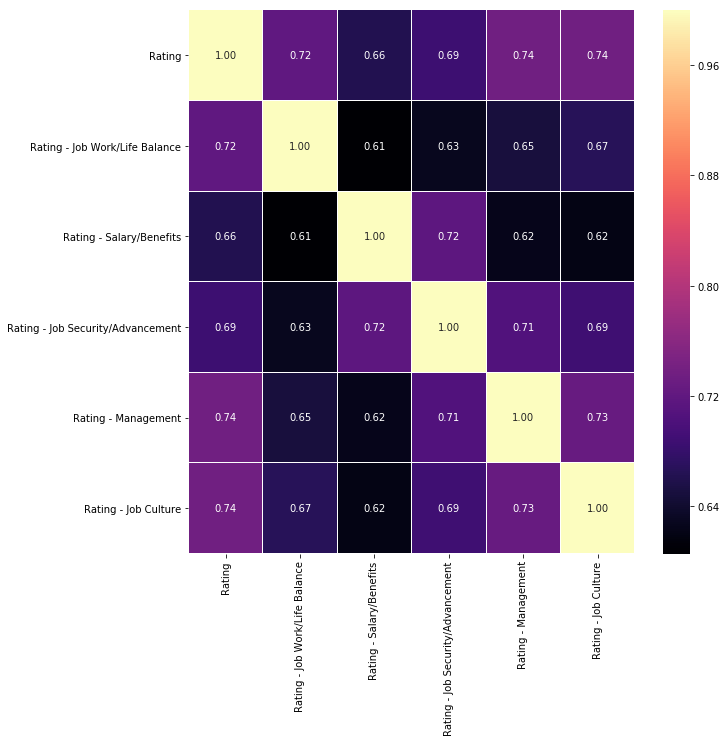

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(exclude_date.corr('spearman'), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

We try to understand which sub-rating the employees consider the most to score final rating (Rating column).

For example correlation of Rating and Rating - Management: those employees that voted 5 to Rating, heavily voted 5 to Rating - Management as well

Text(0,0.5,'Engagement Rate')

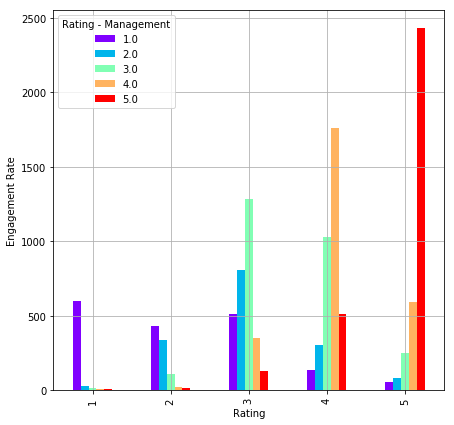

In [18]:
rate_management=pd.crosstab(data.Rating,data['Rating - Management'],margins=False) 
ax=rate_management.plot(kind='bar',figsize=(7,7),colormap='rainbow',grid=True)
ax.set_ylabel('Engagement Rate')

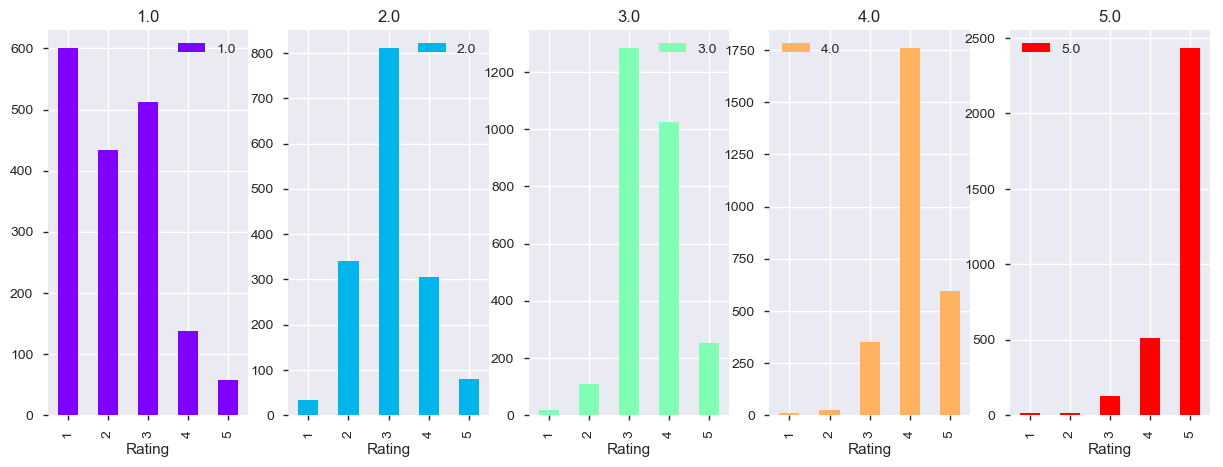

In [25]:
ax=rate_management.plot(kind='bar',figsize=(15,5),subplots=True, layout=(1,5),colormap='rainbow',grid=True)


## Current and Former employees

From general rating we can see that current employees are slightly happier 

Current    Rating 4: 34% and Rating 5: 31%  

Former     Rating 4: 30% and Rating 5: 28% 

In [19]:
emp_status=pd.crosstab(data.Rating,data['Employment Status'],margins=True,normalize='columns')
emp_status=emp_status.drop(['All'],axis=1)
emp_status

Employment Status,Current Employee,Former Employee
Rating,,
1,0.040139,0.061701
2,0.060476,0.084525
3,0.248595,0.261985
4,0.340648,0.305886
5,0.310142,0.285901


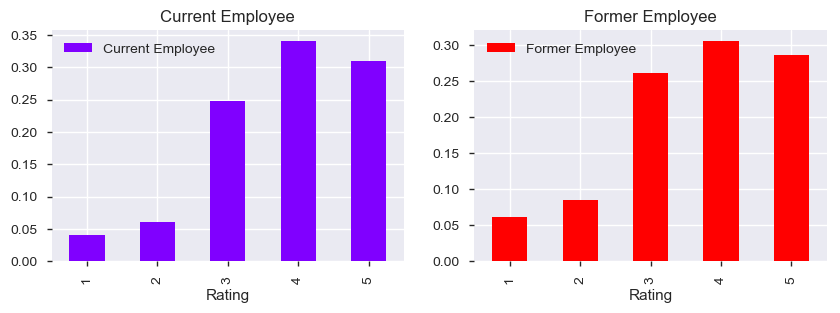

In [29]:
ax=emp_status.plot(kind='bar',figsize=(10,3),subplots=True, layout=(1,2),colormap='rainbow',grid=True)


In [96]:
#The average of rating for both current and former employees
for col in ratings:
    print(col, data[col].mean())

('Rating - Job Work/Life Balance', 3.6270028672626076)
('Rating - Salary/Benefits', 3.1077131029821747)
('Rating - Job Security/Advancement', 3.360575296108291)
('Rating - Management', 3.3289395859738065)
('Rating - Job Culture', 3.559867807812897)


The Histogram plot is another way to compare current and former employees. As discussed above, lower rate in former group is slightly larger 

,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture,Rating
Employment Status,,,,,,
Current Employee,3.746358,3.115901,3.469662,3.479566,3.681558,3.820177
Former Employee,3.577001,3.104272,3.314797,3.265715,3.508725,3.669761


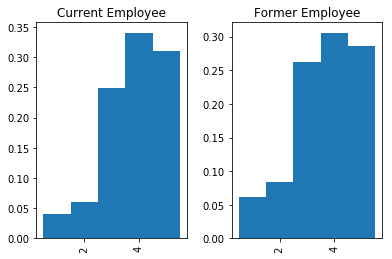

In [99]:
ratings_plus = ratings+['Rating', 'Employment Status']
ratings_plus
data['Rating'].hist(bins=[x + 0.5 for x in range(0,6)], by = data['Employment Status'], density=True)
data[ratings_plus].groupby(['Employment Status']).mean() # compare all averages 

### The Rating distribution for unhappy former employees

We are trying to study the distribution of rating for those former employees that were NOT satisfied with job. What are the main reasons of dissatisfaction? All ratings are right skewed however, the management rating is more distributed to the left side (Rating-management=1) which indicates that former employees complain more about management.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2aecc9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a28ae4b50>]], dtype=object)

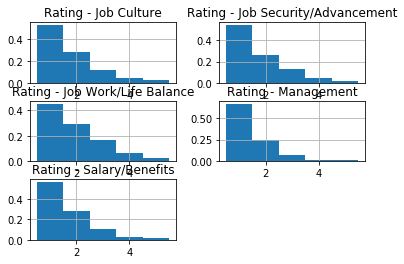

In [100]:
subset = (data['Rating']<3) & (data['Employment Status']=='Former Employee')
df_lowrate = data.loc[subset]
df_lowrate[ratings].hist(bins=[x + 0.5 for x in range(0,6)], density=True)

## All former employees, Rating explained by categorical ratings

The following analysis indicates that the rating of 'life balance' and 'job cultures' has higher weight in final rating. 

In [103]:
from mord import LogisticAT


df_former = data[data['Employment Status']=='Former Employee']
ratings_plus =ratings+['Rating']
df_former = df_former.dropna(how='any', subset=ratings_plus)
xratings = [x for x in data.columns if x.startswith('Rating -')]
clf = LogisticAT()
clf.fit(df_former[ratings], df_former['Rating'] )
res = pd.DataFrame({'Rating':ratings,'Coef':[round(x,3) for x in clf.coef_]})
res

,Coef,Rating
0,0.883,Rating - Job Work/Life Balance
1,0.407,Rating - Salary/Benefits
2,0.222,Rating - Job Security/Advancement
3,0.645,Rating - Management
4,0.689,Rating - Job Culture


## Unhappy former employees, Rating explained by categorical ratings

The following analysis also confirms the above histogram plots. Those former employees that rated 1 or 2, concerns more about managment and life balance 

In [105]:
df_leftsad = data[(data['Rating']<3) & (data['Employment Status']=='Former Employee')]
df_leftsad = df_leftsad.dropna(how='any')
clf2 = LogisticAT()
clf2.fit(df_leftsad[ratings], df_leftsad['Rating'] )
res = pd.DataFrame({'Rating':ratings,'Coef':[round(x,3) for x in clf2.coef_]})
res

,Coef,Rating
0,0.748,Rating - Job Work/Life Balance
1,0.342,Rating - Salary/Benefits
2,0.320,Rating - Job Security/Advancement
3,0.882,Rating - Management
4,0.468,Rating - Job Culture


## Comparison of Rating over years for both group of employees

**Average ratings for both groups indicate that:** 
1. Former employee's review in 2013 was not great but significantly was improved in 2014 and 2015
2. Generally speaking, rating scores are declining over years
3. The rate of decline for Management and job security seems to be more than others
4. Both groups are unhappy with their salary and benefit and unfortuenatly it is declining for current employees in 2019

In [3]:
current=data[data['Employment Status']=='Current Employee']
former=data[data['Employment Status']!='Current Employee']

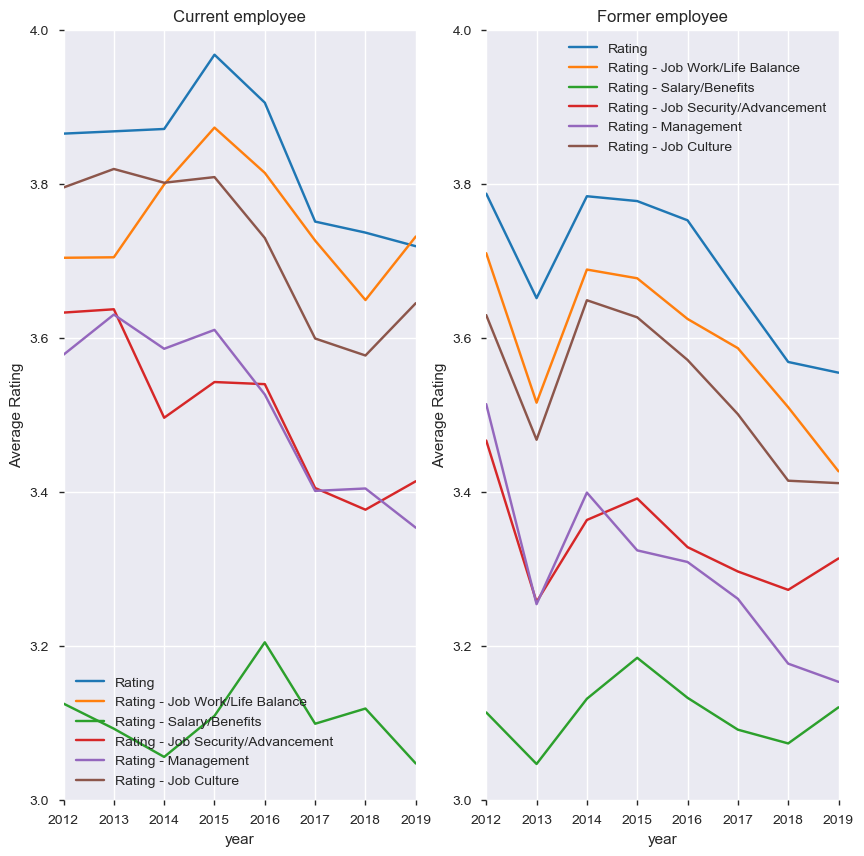

In [31]:
fig, axes = plt.subplots(1,2)
for ax in axes:
    ax.set_ylim([3,4])

axes[0].set_title('Current employee')
axes[1].set_title('Former employee')  
for ax in axes.flat:
    ax.set(ylabel='Average Rating')
current.groupby('year').mean()[[x for x in current.columns if x.startswith('Rating')]].plot(ax = axes[0],figsize=(10,10));
former.groupby('year').mean()[[x for x in current.columns if x.startswith('Rating')]].plot(ax = axes[1],figsize=(10,10));
plt.show()


### The table below shows average ratings for both groups from 2012 to 2019

In [21]:
all_ratings = [x for x in data.columns if x.startswith('Rating')]
data.pivot_table(values=all_ratings,index=['year','Employment Status'])

Rating  Rating - Job Culture  \
year Employment Status                                   
2012 Current Employee   3.865248              3.795276   
     Former Employee    3.787286              3.629526   
2013 Current Employee   3.868217              3.819328   
     Former Employee    3.651603              3.467662   
2014 Current Employee   3.871287              3.801471   
     Former Employee    3.783934              3.648867   
2015 Current Employee   3.967742              3.808786   
     Former Employee    3.777646              3.626685   
2016 Current Employee   3.905426              3.729685   
     Former Employee    3.752672              3.571307   
2017 Current Employee   3.751000              3.599161   
     Former Employee    3.659548              3.500910   
2018 Current Employee   3.736695              3.577093   
     Former Employee    3.568693              3.414484   
2019 Current Employee   3.719008              3.645022   
     Former Employee    3.554775              3.411326   

                        Rating - Job Security/Advancement  \
year Employment Status                                      
2012 Current Employee                            3.632812   
     Former Employee                             3.466667   
2013 Current Employee                            3.637131   
     Former Employee                             3.257048   
2014 Current Employee                            3.496269   
     Former Employee                             3.363489   
2015 Current Employee                            3.542636   
     Former Employee                             3.391421   
2016 Current Employee                            3.539867   
     Former Employee                             3.328218   
2017 Current Employee                            3.405010   
     Former Employee                             3.296599   
2018 Current Employee                            3.376833   
     Former Employee                             3.272727   
2019 Current Employee                            3.413793   
     Former Employee                             3.313522   

                        Rating - Job Work/Life Balance  Rating - Management  \
year Employment Status                                                        
2012 Current Employee                         3.704000             3.578125   
     Former Employee                          3.709945             3.513889   
2013 Current Employee                         3.704641             3.630252   
     Former Employee                          3.515807             3.254153   
2014 Current Employee                         3.799270             3.585821   
     Former Employee                          3.688710             3.399031   
2015 Current Employee                         3.873057             3.610390   
     Former Employee                          3.677376             3.324000   
2016 Current Employee                         3.814262             3.526403   
     Former Employee                          3.624576             3.308936   
2017 Current Employee                         3.726327             3.401254   
     Former Employee                          3.586612             3.261126   
2018 Current Employee                         3.649123             3.404380   
     Former Employee                          3.509944             3.176892   
2019 Current Employee                         3.731602             3.353448   
     Former Employee                          3.426667             3.153274   

                        Rating - Salary/Benefits  
year Employment Status                            
2012 Current Employee                   3.125000  
     Former Employee                    3.113573  
2013 Current Employee                   3.092437  
     Former Employee                    3.046589  
2014 Current Employee                   3.055762  
     Former Employee                    3.131280  
2015 Current Employee                   3.109091  


## Ratio of  frequency of Rating for both groups over years

**Although the average Rating of both groups are below 4, more than 50% of both groups rated above 4. We already knew that!** 


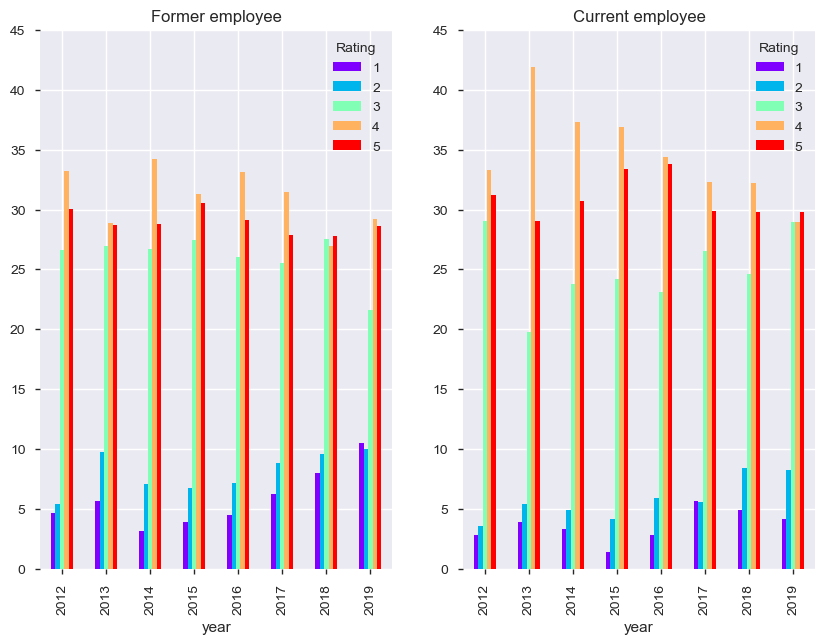

In [34]:
rating_former=pd.crosstab(former.year,former.Rating,margins=True)
rating_former = rating_former[rating_former.columns[0:]].div(rating_former['All'], 0)*100
#drob col and row 'All'
rating_former=rating_former.drop(['All'], axis=1)
rating_former=rating_former.iloc[0:8]


rating_current=pd.crosstab(current.year,current.Rating,margins=True)
rating_current = rating_current[rating_current.columns[0:]].div(rating_current['All'], 0)*100
#drob col and row 'All'
rating_current=rating_current.drop(['All'], axis=1)
rating_current=rating_current.iloc[0:8]

fig, axes = plt.subplots(1,2)
for ax in axes:
    ax.set_ylim([0,45])

rating_former.plot(kind='bar',figsize=(10,7),layout=(1,2),colormap='rainbow',grid=True,ax=axes[0])
axes[0].set_title("Former employee")


rating_current.plot(kind='bar',figsize=(10,7),layout=(1,2),colormap='rainbow',grid=True,ax=axes[1])
axes[1].set_title("Current employee")

plt.show()




**Table below shows that over 10% and 14% of current and former employees are generally unhappy. We try to find reasons**



In [23]:
emp_status

Employment Status,Current Employee,Former Employee
Rating,,
1,0.040139,0.061701
2,0.060476,0.084525
3,0.248595,0.261985
4,0.340648,0.305886
5,0.310142,0.285901


## Natural Language Processing

Run the code cell below to load necessary Python libraries and load the new dataset.

In [24]:
import nltk
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

### Target value and Title_Body column

Create new column,'Title_Body', that includes both 'Title' and 'Body' information and the following subsets of data

1. low_rate: Unhappy group of current and former employees with general rating below 3
2. high_rate: happy group of current and former employees with general rating above 3
3. nlp_data: ignore #3328 employees that ranked Rating=3 and make Target value unhappy:0 and happy:1 employees

In [25]:
data['Title_Body'] = data[['Title', 'Body']].apply(lambda x: ' '.join(x), axis=1)
low_rate=data[data.Rating<=2]
high_rate=data[data.Rating>=4]

In [26]:
nlp_data=data[data.Rating!=3]
nlp_data['Target_Rating'] = nlp_data['Rating'].apply(lambda x: 0 if x <=2 else 1)

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Check the frequency of words used in 'Title_Body'  for low_rate and high_rate groups

In [28]:
ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lem = WordNetLemmatizer()

# word freq distribution for low_rate group
low_rate_word_freq=[]

for i in range(len(low_rate.Body)):
    text = low_rate.Title_Body.iloc[i]
    text = text.lower() #changes everything to lower case
    nopunct_text = re.sub('[^a-z0-9]',' ',text) #remove non alphanumeric characters
    #tokenize
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    #remove stopwords, lemmatize and stem
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if not w in stop_words]    
    low_rate_word_freq.append(filtered)
    
# word freq distribution for high_rate group
high_rate_word_freq=[]

for i in range(len(high_rate.Body)):
    text = high_rate.Title_Body.iloc[i]
    text = text.lower() #changes everything to lower case
    nopunct_text = re.sub('[^a-z0-9]',' ',text) #remove non alphanumeric characters
    #tokenize
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    #remove stopwords, lemmatize and stem
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if not w in stop_words]    
    high_rate_word_freq.append(filtered)    
    

In [29]:
#create flat list of words
low_flat_list = [item for sublist in low_rate_word_freq for item in sublist]
high_flat_list = [item for sublist in high_rate_word_freq for item in sublist]

**The plots below are not informative showing that the frequencies of 'work', 'customer', 'job' are the highest**

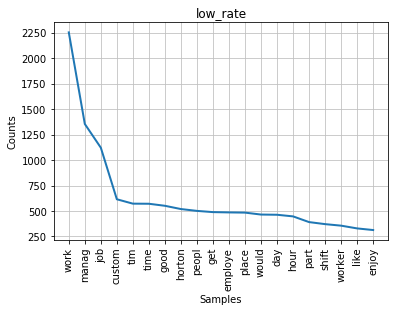

In [30]:
from nltk.probability import FreqDist

# Frequency Distribution Plot
low_fdist = FreqDist(low_flat_list)
low_fdist.plot(20,cumulative=False,title='low_rate')


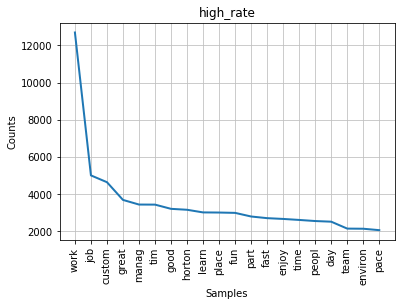

In [31]:
high_fdist = FreqDist(high_flat_list)
high_fdist.plot(20,cumulative=False,title='high_rate')

## Wordcloud function

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

 ### For low_rate group the words like management, disorganized, Terrible, First, Fast, unfair, etc. are explainable 

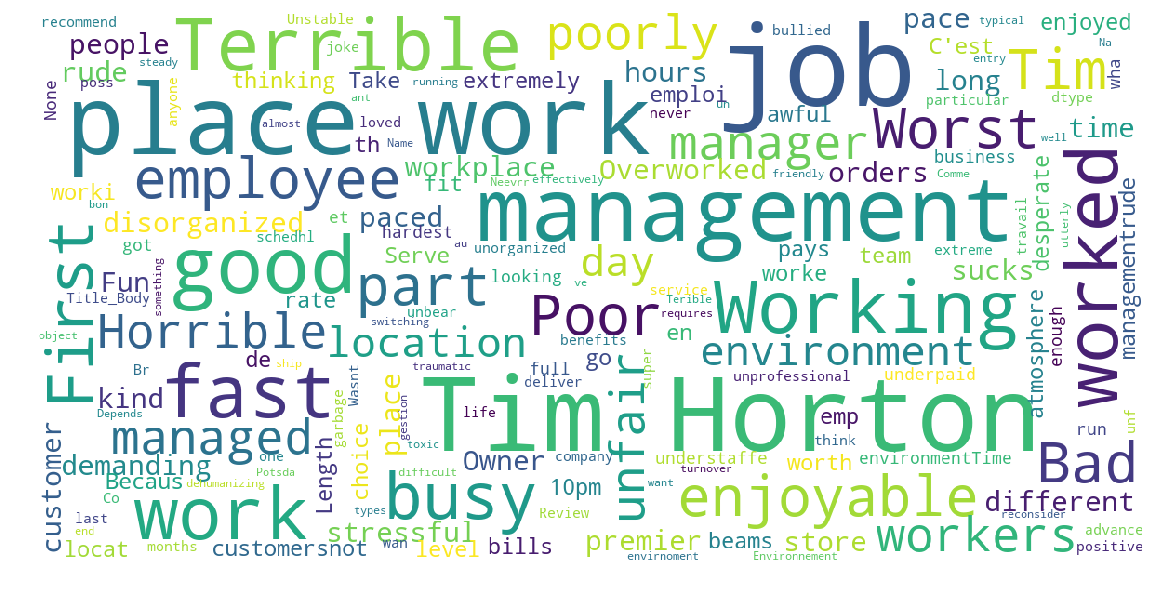

In [70]:
# print wordcloud for low_rate
show_wordcloud(low_rate["Title_Body"])

### For high_rate group the words like Productive, enjoyable, experience, etc. are positive

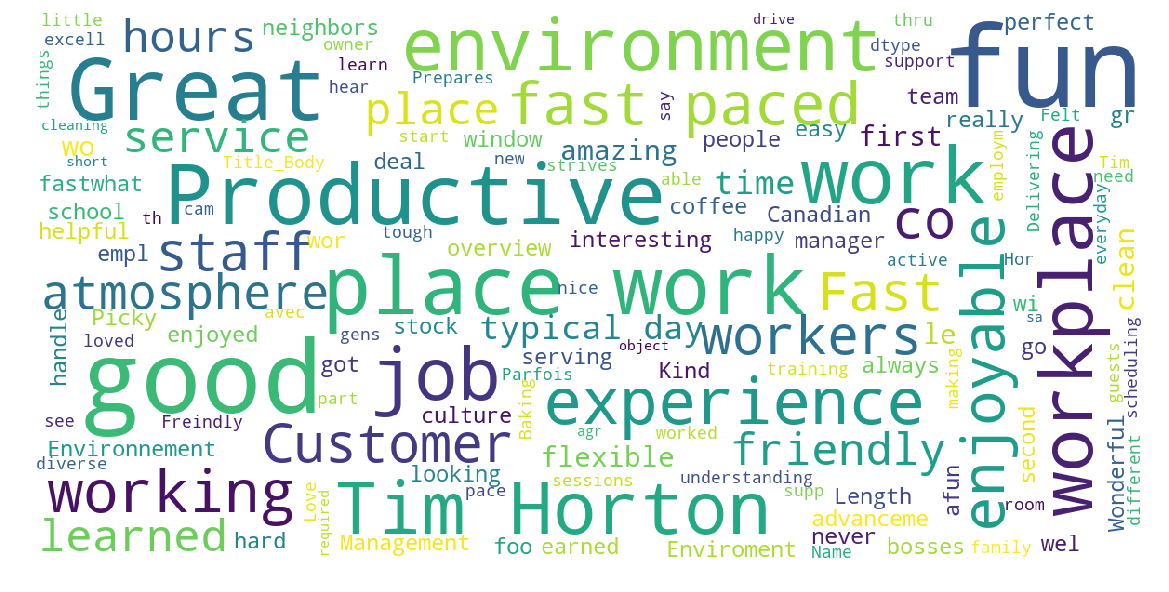

In [34]:
# print wordcloud for high_rate
show_wordcloud(high_rate["Title_Body"])

# Key Reasons for Job Dissatisfaction

We focus on low_rate group to understand the reasons of low rating. 

Generating the word cloud of bigram or trigram is one way to derive initial conclusion

In [71]:
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output

## low_rate["Title"] and low_rate["Title_Body"]

The highlight words are the following:
    
. Fast_paced

. Poor_managment

. Stressful

. Terrible

. Horrible

. Workers

. No benefit

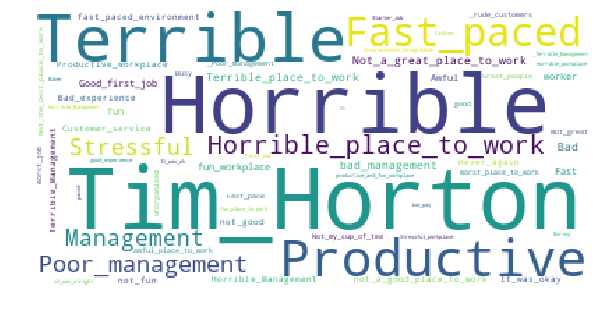

In [36]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(";".join(low_rate["Title"]).replace(" ", "_"))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

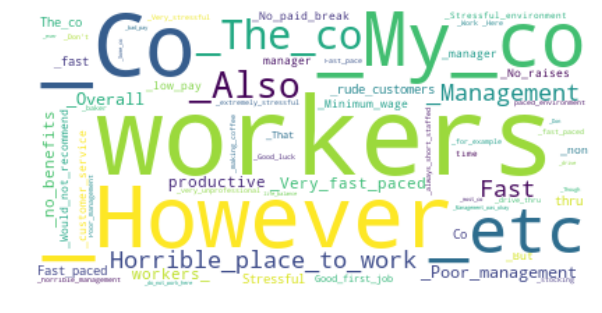

In [68]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(";".join(low_rate["Title_Body"]).replace(" ", "_"))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [73]:
low_rate_title=[]

for i in range(len(low_rate.Body)):
    text = low_rate.Title.iloc[i]
    text = text.lower() 
    nopunct_text = re.sub('[^a-z0-9]',' ',text) 
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if not w in stop_words]    
    low_rate_title.append(filtered)
    
low_rate_title = [item for sublist in low_rate_title for item in sublist]    

**The following function make ngrams**

In [74]:
from itertools import tee, islice
from collections import Counter


def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

In [77]:
bg_dict=Counter(ngrams(low_rate_title, 2))
bg_dict=dict(bg_dict) #convert to dict
bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
#bg_dict_sorted[0:30] # First 30 bigrams

### Fast-paced has high frequency and combination of management like (poor or bad or terrible)

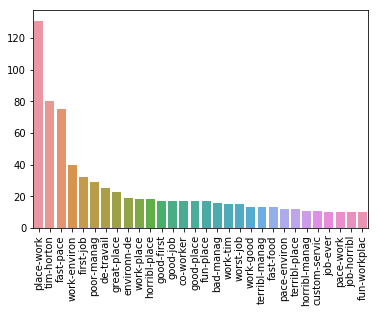

In [76]:
bg_dict_sorted = bg_dict_sorted[0:30]
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: '-'.join(x), bg))
g=sns.barplot(bg_str, counts)
for item in g.get_xticklabels():
         item.set_rotation(90)

## BigramAssocMeasures and PMI score to find the most import bigrams 

It is better to clean up words (stemming, lemmatization , stopwords, punctuation,...) and test low_rate['Title] and low_rate['Body'] beside low_rate['Title_Body']. We are looking for initial analysis here

In [86]:
words = np.concatenate(np.array([word_tokenize(r) for r in low_rate['Title_Body'].values]))

### Minimum wage and fast paced have high frequencies

In [93]:
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)# replacement of low_rate_title shows the same result as bar chart above


finder.apply_freq_filter(15) 
finder.nbest(bigram_measures.pmi, 30) 

[(u'drive', u'thru'),
 (u'minimum', u'wage'),
 (u'tim', u'hortons'),
 (u'\u2019', u't'),
 (u'\u2019', u's'),
 (u'co', u'workers'),
 (u'A', u'typical'),
 (u'high', u'school'),
 (u'de', u'travail'),
 (u'Fast', u'paced'),
 (u'customer', u'service'),
 (u'each', u'other'),
 (u'fast', u'paced'),
 (u'Environnement', u'de'),
 (u'team', u'members'),
 (u'fast', u'pace'),
 (u'hardest', u'part'),
 (u'even', u'though'),
 (u'most', u'enjoyable'),
 (u'typical', u'day'),
 (u'Horton', u"'s"),
 (u'Tim', u'Hortons'),
 (u'Tim', u'Horton'),
 (u'has', u'been'),
 (u'Typical', u'day'),
 (u'...', u'...'),
 (u'taught', u'me'),
 (u'night', u'shift'),
 (u'care', u'about'),
 (u'too', u'much')]

## Machine Learning: RandomForestClassifier & LogisticRegression

showing initial models

In [38]:
ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lem = WordNetLemmatizer()


corpus = []
for i in range(len(nlp_data.Body)):
    text = nlp_data.Title_Body.iloc[i]
    text = text.lower() #changes everything to lower case
    nopunct_text = re.sub('[^a-z0-9]',' ',text) #remove non alphanumeric characters
    #tokenize
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    #remove stopwords, lemmatize and stem
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if not w in stop_words]
    filtered_text = ' '.join(filtered)
    corpus.append(filtered_text)
    
#Use BoW to convert corpus to
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow = CountVectorizer()
X = bow.fit_transform(corpus).toarray()
word_list = bow.vocabulary_
y = nlp_data.Target_Rating.values
    

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


rf = RandomForestClassifier(max_depth=25)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.83570234113712372

In [40]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.86872909698996659

### Use TFIDF to convert corpus to X

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
word_list = tfidf.vocabulary_
y = nlp_data.Target_Rating.values


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


clf1 = LogisticRegression()
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.87834448160535117